In [5]:
import pandas as pd
import seaborn as sns

In [6]:
avalanche_set = pd.read_csv('newData/gesamt_set.csv', sep=',')

<AxesSubplot:>

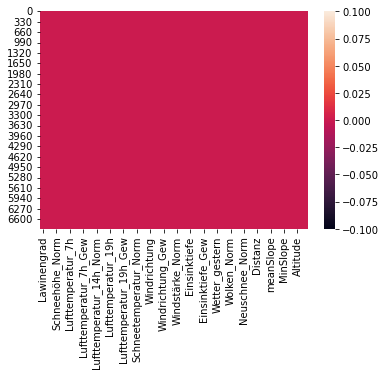

In [7]:
avalanche_set['ID'] = avalanche_set['ID'].fillna(0)
avalanche_set = avalanche_set.drop([ 'Datum','Intervall','ZEIT','Lawinenabgänge', 'ID', 'Volumen', 'Lawinen_Art',], axis=1)
avalanche_set = avalanche_set.dropna()


sns.heatmap(avalanche_set.isna())

In [8]:
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']

#estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

estimators = make_pipeline(StandardScaler(), svm.SVC())
selectors = GeneticSelectionCV(estimators,
                               cv=5,
                               verbose=2,
                               scoring="accuracy",
                               n_population=60,
                               crossover_proba=0.6,
                               mutation_proba=0.2,
                               n_generations=50,
                               crossover_independent_proba=0.6,
                               mutation_independent_proba=0.06,
                               tournament_size=4,
                               n_gen_no_change=5,
                               caching=True,
                               n_jobs=4)
selectors = selectors.fit(X, y)



Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	60    	[  0.702216  19.35       0.019989]	[  0.036798  11.381015   0.008105]	[ 0.606455  1.        0.000178]	[  0.745552  39.         0.043298]
1  	42    	[  0.736781  31.2        0.018218]	[ 0.008399  5.243409  0.002438]   	[  0.708496  19.         0.008548]	[  0.74729  39.        0.02416]   
2  	42    	[  0.742289  33.866667   0.018491]	[ 0.003821  4.432707  0.001872]   	[  0.728471  19.         0.014786]	[  0.748303  39.         0.024079]
3  	40    	[  0.744489  34.05       0.01866 ]	[ 0.003643  3.263051  0.002407]   	[  0.726589  25.         0.012799]	[  0.749605  39.         0.023643]
4  	40    	[  0.745333  31.983333   0.019276]	[ 0.00459   3.030356  0.002796]   	[  0.72413   21.         0.007047]	[  0.749605  37.         0.024223]
5  	42    	[  0.746872  30.383333   0.02027 ]	[ 0.003277 

In [9]:
selected_features = selectors.get_support()
for i in range(0, len(selected_features)):
    if selected_features[i] == True:
        print(feature_names[i])

Lawinengrad
Schneehöhe
Lufttemperatur_7h_Gew
Lufttemperatur_14h
Lufttemperatur_14h_Norm
Lufttemperatur_14h_Gew
Lufttemperatur_19h
Lufttemperatur_19h_Gew
Schneetemperatur
Schneetemperatur_Norm
Windrichtung_Norm
Windrichtung_Gew
Windstärke
Windstärke_Gew
Einsinktiefe_Norm
Wetter_gestern
Wolken
Wolken_Norm
Neuschnee_Norm
meanExpo
meanSlope
stdDevSlope
MinSlope
MaxSlope
Altitude


In [10]:
estimators = make_pipeline(StandardScaler(), svm.SVC())
selectors = GeneticSelectionCV(estimators,
                               cv=10,
                               verbose=2,
                               scoring="accuracy",
                               n_population=60,
                               crossover_proba=0.6,
                               mutation_proba=0.2,
                               n_generations=50,
                               crossover_independent_proba=0.6,
                               mutation_independent_proba=0.06,
                               tournament_size=4,
                               n_gen_no_change=10,
                               caching=True,
                               n_jobs=4)
selectors = selectors.fit(X, y)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	60    	[  0.702436  20.183333   0.030287]	[  0.034101  12.248118   0.012061]	[ 0.596456  1.        0.014255]	[  0.744674  39.         0.070312]
1  	44    	[  0.731253  31.066667   0.024354]	[ 0.007893  5.9382    0.005397]   	[  0.703288  12.         0.016802]	[  0.746705  39.         0.037684]
2  	44    	[  0.738348  27.866667   0.027684]	[ 0.007585  5.028143  0.005347]   	[  0.723689  18.         0.018469]	[  0.751479  39.         0.040052]
3  	41    	[  0.745481  25.083333   0.029799]	[ 0.00404   3.47511   0.003917]   	[  0.733964  18.         0.02338 ]	[  0.753217  31.         0.038224]
4  	35    	[  0.747431  24.233333   0.03035 ]	[ 0.00493   2.962919  0.004567]   	[  0.729045  18.         0.013914]	[  0.753217  29.         0.040993]
5  	38    	[  0.750074  24.366667   0.031409]	[ 0.004373 

In [11]:
selected_features = selectors.get_support()
for i in range(0, len(selected_features)):
    if selected_features[i] == True:
        print(feature_names[i])

Schneehöhe
Lufttemperatur_7h_Norm
Lufttemperatur_14h_Gew
Lufttemperatur_19h
Lufttemperatur_19h_Gew
Schneetemperatur
Schneetemperatur_Norm
Schneetemperatur_Gew
Windrichtung_Norm
Windrichtung_Gew
Wetter_akt
Wetter_gestern
Wolken
Wolken_Norm
Neuschnee_Norm
Distanz
meanExpo
meanSlope
stdDevSlope
MinSlope
MaxSlope
Altitude
